# Smart Watch Prediction

This is a project about prediction of smart watches based on their features. In this project, there will be things to cover like:

1. Preprocessing data e.g. add some feature engineering or remove irrelevant data. Fill null value with something common or anything if happens
2. Visualizing data correlation between features and target (prices)
3. Make a prediction using scikit-learn
4. Make a machine learning pipeline using scikit learn
5. Make an application using streamlit

## Preprocessing data

First we need to know how good our data, and what techniques we can use to engineer this data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


In [2]:
URL = "Smart watch prices.csv"

df = pd.read_csv(URL)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      378 non-null    object 
 1   Model                      378 non-null    object 
 2   Operating System           376 non-null    object 
 3   Connectivity               378 non-null    object 
 4   Display Type               377 non-null    object 
 5   Display Size (inches)      376 non-null    float64
 6   Resolution                 375 non-null    object 
 7   Water Resistance (meters)  378 non-null    object 
 8   Battery Life (days)        378 non-null    object 
 9   Heart Rate Monitor         378 non-null    object 
 10  GPS                        378 non-null    object 
 11  NFC                        378 non-null    object 
 12  Price (USD)                378 non-null    object 
dtypes: float64(1), object(12)
memory usage: 38.6+ KB


We have some Null data like: 
* Operating System 
* Display Type 
* Display Size 
* Resolution. 

So wee need to change it too

But from what we see, we know that our data just have one numerical data. But it's little bit supcicious because usually prices, Battery Life, Resolution has numerical data type

In [3]:
df

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Withings,ScanWatch,Withings OS,"Bluetooth, Wi-Fi",PMOLED,1.38,348 x 442,50,30,Yes,No,Yes,$279
375,Zepp,Z,Zepp OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.39,454 x 454,50,15,Yes,Yes,Yes,$349
376,Honor,Watch GS Pro,Lite OS,"Bluetooth, Wi-Fi",AMOLED,1.39,454 x 454,50,25,Yes,Yes,Yes,$249
377,Oppo,Watch Free,ColorOS,"Bluetooth, Wi-Fi",AMOLED,1.64,326 x 326,50,14,Yes,No,Yes,$159


But when we see our dataframe, there is 379 rows but in the info they just have 378 Not NULL. So I think there is row that has all NAN valuey
ohh I think because prices, water resistance, resolution and battery life is assigned as a string by the owner

In [4]:
df.loc[df['Brand'].isnull()]

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So let's break up with these row, let's drop row with all null value

In [5]:
df.dropna(how='all', inplace=True)

so let's check if null value is match with the number of rows

In [6]:
df

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Withings,ScanWatch,Withings OS,"Bluetooth, Wi-Fi",PMOLED,1.38,348 x 442,50,30,Yes,No,Yes,$279
375,Zepp,Z,Zepp OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.39,454 x 454,50,15,Yes,Yes,Yes,$349
376,Honor,Watch GS Pro,Lite OS,"Bluetooth, Wi-Fi",AMOLED,1.39,454 x 454,50,25,Yes,Yes,Yes,$249
377,Oppo,Watch Free,ColorOS,"Bluetooth, Wi-Fi",AMOLED,1.64,326 x 326,50,14,Yes,No,Yes,$159


so let's start with the easy one, we want to change string values from Water Resistance and Battery Life into numerical

In [7]:
df[['Battery Life (days)', 'Water Resistance (meters)']].value_counts()


Battery Life (days)  Water Resistance (meters)
14                   50                           60
2                    50                           37
3                    50                           31
6                    50                           23
24                   30                           16
2                    30                           14
18                   50                           14
1                    30                           13
25                   50                           12
5                    50                           12
24                   50                           11
14                   100                          11
30                   50                           10
16                   50                           10
14                   30                            9
4                    50                            8
1                    50                            8
1.5                  50                            7

In [8]:
df['Battery Life (days)'].value_counts()

Battery Life (days)
14           83
2            54
3            37
24           29
6            23
1            22
5            18
18           15
25           12
1.5          10
30           10
16           10
7             8
4             8
15            6
10            4
45            4
9             4
70            4
Unlimited     3
40            2
12            2
72            2
20            2
11            1
56            1
48 hours      1
48            1
60            1
8             1
Name: count, dtype: int64

In [9]:
df['Water Resistance (meters)'].value_counts()

Water Resistance (meters)
50               275
30                65
100               26
200                8
1.5                2
Not specified      1
10                 1
Name: count, dtype: int64

Ohh my bad, it's because there is `not specified` category in Water Resistance and `Unlimited` and `48 hours` in Battery Lifes

In [10]:
def change_to_numeric(x):
    try:
        return float(x)
    except ValueError:
        x_split = x.split()
        print(x_split[0])
        try:
            return float(x_split[0])
        except ValueError:
            return "NA"

        

In [11]:
df_new = df.copy()
df_new['Water Resistance (meters)'] = df_new['Water Resistance (meters)'].apply(change_to_numeric)
df_new['Battery Life (days)'] = df_new['Battery Life (days)'].apply(change_to_numeric)
df_new

Not
48
Unlimited
Unlimited
Unlimited


,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50.0,18.0,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50.0,40.0,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50.0,11.0,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50.0,6.0,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30.0,24.0,Yes,Yes,Yes,$299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Withings,ScanWatch,Withings OS,"Bluetooth, Wi-Fi",PMOLED,1.38,348 x 442,50.0,30.0,Yes,No,Yes,$279
375,Zepp,Z,Zepp OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.39,454 x 454,50.0,15.0,Yes,Yes,Yes,$349
376,Honor,Watch GS Pro,Lite OS,"Bluetooth, Wi-Fi",AMOLED,1.39,454 x 454,50.0,25.0,Yes,Yes,Yes,$249
377,Oppo,Watch Free,ColorOS,"Bluetooth, Wi-Fi",AMOLED,1.64,326 x 326,50.0,14.0,Yes,No,Yes,$159


In [12]:
df_new['Battery Life (days)'].value_counts()

Battery Life (days)
14.0    83
2.0     54
3.0     37
24.0    29
6.0     23
1.0     22
5.0     18
18.0    15
25.0    12
1.5     10
30.0    10
16.0    10
4.0      8
7.0      8
15.0     6
70.0     4
45.0     4
10.0     4
9.0      4
NA       3
20.0     2
48.0     2
72.0     2
40.0     2
12.0     2
56.0     1
60.0     1
11.0     1
8.0      1
Name: count, dtype: int64

In [13]:
df_new['Water Resistance (meters)'].value_counts()

Water Resistance (meters)
50.0     275
30.0      65
100.0     26
200.0      8
1.5        2
NA         1
10.0       1
Name: count, dtype: int64

In [14]:
try:
    df_new.replace(["NA"], np.nan, inplace=True)
except ValueError:
    df_new

In [15]:
df_new.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      378 non-null    object 
 1   Model                      378 non-null    object 
 2   Operating System           376 non-null    object 
 3   Connectivity               378 non-null    object 
 4   Display Type               377 non-null    object 
 5   Display Size (inches)      376 non-null    float64
 6   Resolution                 375 non-null    object 
 7   Water Resistance (meters)  377 non-null    float64
 8   Battery Life (days)        375 non-null    float64
 9   Heart Rate Monitor         378 non-null    object 
 10  GPS                        378 non-null    object 
 11  NFC                        378 non-null    object 
 12  Price (USD)                378 non-null    object 
dtypes: float64(3), object(10)
memory usage: 41.3+ KB


,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Withings,ScanWatch,Withings OS,"Bluetooth, Wi-Fi",PMOLED,1.38,348 x 442,50,30,Yes,No,Yes,$279
375,Zepp,Z,Zepp OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.39,454 x 454,50,15,Yes,Yes,Yes,$349
376,Honor,Watch GS Pro,Lite OS,"Bluetooth, Wi-Fi",AMOLED,1.39,454 x 454,50,25,Yes,Yes,Yes,$249
377,Oppo,Watch Free,ColorOS,"Bluetooth, Wi-Fi",AMOLED,1.64,326 x 326,50,14,Yes,No,Yes,$159


In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      378 non-null    object 
 1   Model                      378 non-null    object 
 2   Operating System           376 non-null    object 
 3   Connectivity               378 non-null    object 
 4   Display Type               377 non-null    object 
 5   Display Size (inches)      376 non-null    float64
 6   Resolution                 375 non-null    object 
 7   Water Resistance (meters)  377 non-null    float64
 8   Battery Life (days)        375 non-null    float64
 9   Heart Rate Monitor         378 non-null    object 
 10  GPS                        378 non-null    object 
 11  NFC                        378 non-null    object 
 12  Price (USD)                378 non-null    object 
dtypes: float64(3), object(10)
memory usage: 41.3+ KB


In [17]:
df_new['Operating System'].value_counts()

Operating System
Wear OS           131
Garmin OS          34
Lite OS            26
Fitbit OS          24
Amazfit OS         19
watchOS            14
Tizen OS           14
Proprietary OS     12
Polar OS           11
Proprietary         9
Suunto OS           9
Android Wear        9
ColorOS             7
Withings OS         6
Zepp OS             5
Tizen               4
LiteOS              4
Timex OS            4
Casio OS            4
HarmonyOS           3
Custom OS           3
Fossil OS           3
Android OS          3
Matrix OS           2
Realme OS           2
MyKronoz OS         2
MIUI                2
MIUI for Watch      2
Android             2
Mi Wear OS          1
Nubia OS            1
Hybrid OS           1
RTOS                1
Skagen OS           1
MIUI For Watch      1
Name: count, dtype: int64

I think it's good idea to change resolution as the result of mutliplication of it. Let's see what' inside the resolution

In [18]:
df_new['Resolution'].value_counts()

Resolution
454 x 454    90
360 x 360    53
240 x 240    49
390 x 390    41
416 x 416    17
400 x 400    17
336 x 336    16
328 x 328    10
368 x 448    10
320 x 320     7
348 x 442     6
280 x 280     6
372 x 430     5
480 x 480     4
128 x 128     4
176 x 176     4
320 x 300     4
348 x 250     4
300 x 300     3
280 x 456     3
324 x 394     3
402 x 476     2
160 x 160     2
228 x 172     2
240 x 201     2
260 x 260     1
320 x 302     1
126 x 36      1
396 x 484     1
960 x 192     1
240 x 198     1
200 x 200     1
450 x 450     1
394 x 324     1
466 x 466     1
326 x 326     1
Name: count, dtype: int64

Oke I think it doesnt have anything weird so let's change it using dataframe.apply

In [19]:
def change_resolution(x):
    print(x)
    try:
        x_new = x.split("x")
        wd_pixel = int(x_new[0])
        hd_pixel = int(x_new[1])
        return wd_pixel * hd_pixel
    except AttributeError:
        return x

In [20]:
df_new["new_res"] = df_new['Resolution'].apply(change_resolution)
df_new['new_res']

396 x 484
450 x 450
416 x 416
336 x 336
416 x 416
466 x 466
360 x 360
372 x 430
454 x 454
nan
240 x 240
390 x 390
454 x 454
454 x 454
240 x 240
336 x 336
240 x 240
394 x 324
360 x 360
240 x 240
336 x 336
nan
454 x 454
454 x 454
454 x 454
416 x 416
360 x 360
240 x 201
368 x 448
360 x 360
240 x 240
336 x 336
390 x 390
454 x 454
454 x 454
400 x 400
240 x 240
454 x 454
360 x 360
324 x 394
360 x 360
240 x 240
336 x 336
390 x 390
454 x 454
400 x 400
454 x 454
454 x 454
240 x 240
320 x 320
360 x 360
240 x 240
336 x 336
390 x 390
454 x 454
454 x 454
454 x 454
348 x 442
454 x 454
240 x 240
360 x 360
240 x 240
336 x 336
390 x 390
454 x 454
454 x 454
454 x 454
454 x 454
402 x 476
240 x 240
454 x 454
454 x 454
372 x 430
454 x 454
454 x 454
480 x 480
416 x 416
360 x 360
240 x 240
240 x 240
240 x 240
240 x 240
336 x 336
390 x 390
454 x 454
348 x 442
454 x 454
454 x 454
372 x 430
454 x 454
360 x 360
240 x 240
454 x 454
368 x 448
336 x 336
454 x 454
240 x 240
360 x 360
240 x 240
454 x 454
390 x 390
32

0      191664.0
1      202500.0
2      173056.0
3      112896.0
4      173056.0
         ...   
374    153816.0
375    206116.0
376    206116.0
377    106276.0
378    206116.0
Name: new_res, Length: 378, dtype: float64

In [21]:
df_new['new_res']

0      191664.0
1      202500.0
2      173056.0
3      112896.0
4      173056.0
         ...   
374    153816.0
375    206116.0
376    206116.0
377    106276.0
378    206116.0
Name: new_res, Length: 378, dtype: float64

In [22]:
df["Resolution"]

0      396 x 484
1      450 x 450
2      416 x 416
3      336 x 336
4      416 x 416
         ...    
374    348 x 442
375    454 x 454
376    454 x 454
377    326 x 326
378    454 x 454
Name: Resolution, Length: 378, dtype: object

Let's just use the new resolution data for our machine learning model

In [23]:
df_new.drop("Resolution", axis=1, inplace=True)
df_new

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD),new_res
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,50.0,18.0,Yes,Yes,Yes,$399,191664.0
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,50.0,40.0,Yes,Yes,Yes,$249,202500.0
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,50.0,11.0,Yes,Yes,No,$399,173056.0
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,50.0,6.0,Yes,Yes,Yes,$229,112896.0
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,30.0,24.0,Yes,Yes,Yes,$299,173056.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Withings,ScanWatch,Withings OS,"Bluetooth, Wi-Fi",PMOLED,1.38,50.0,30.0,Yes,No,Yes,$279,153816.0
375,Zepp,Z,Zepp OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.39,50.0,15.0,Yes,Yes,Yes,$349,206116.0
376,Honor,Watch GS Pro,Lite OS,"Bluetooth, Wi-Fi",AMOLED,1.39,50.0,25.0,Yes,Yes,Yes,$249,206116.0
377,Oppo,Watch Free,ColorOS,"Bluetooth, Wi-Fi",AMOLED,1.64,50.0,14.0,Yes,No,Yes,$159,106276.0


Last we must change the price to numerical feature

In [24]:
def change_price(x):
    try:
        x_new = x.split("$")
        x_new_2 = x_new[1]
    except IndexError:
        x_new_2 = x
    try:
        return float(x_new_2)
    except ValueError:
        x_new_3 = x_new_2.replace(",", "")
        return float(x_new_3)


In [25]:
"$123".split("$")

['', '123']

In [26]:
df_new['Price (USD)'] = df_new['Price (USD)'].apply(change_price)
df_new

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD),new_res
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,50.0,18.0,Yes,Yes,Yes,399.0,191664.0
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,50.0,40.0,Yes,Yes,Yes,249.0,202500.0
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,50.0,11.0,Yes,Yes,No,399.0,173056.0
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,50.0,6.0,Yes,Yes,Yes,229.0,112896.0
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,30.0,24.0,Yes,Yes,Yes,299.0,173056.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Withings,ScanWatch,Withings OS,"Bluetooth, Wi-Fi",PMOLED,1.38,50.0,30.0,Yes,No,Yes,279.0,153816.0
375,Zepp,Z,Zepp OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.39,50.0,15.0,Yes,Yes,Yes,349.0,206116.0
376,Honor,Watch GS Pro,Lite OS,"Bluetooth, Wi-Fi",AMOLED,1.39,50.0,25.0,Yes,Yes,Yes,249.0,206116.0
377,Oppo,Watch Free,ColorOS,"Bluetooth, Wi-Fi",AMOLED,1.64,50.0,14.0,Yes,No,Yes,159.0,106276.0


In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      378 non-null    object 
 1   Model                      378 non-null    object 
 2   Operating System           376 non-null    object 
 3   Connectivity               378 non-null    object 
 4   Display Type               377 non-null    object 
 5   Display Size (inches)      376 non-null    float64
 6   Water Resistance (meters)  377 non-null    float64
 7   Battery Life (days)        375 non-null    float64
 8   Heart Rate Monitor         378 non-null    object 
 9   GPS                        378 non-null    object 
 10  NFC                        378 non-null    object 
 11  Price (USD)                378 non-null    float64
 12  new_res                    375 non-null    float64
dtypes: float64(5), object(8)
memory usage: 41.3+ KB


### Fill the nan values with most common data for categorical and mean data for numerical data

We can use sklearn for it `SimpleImputer`

In [28]:
from sklearn.impute import SimpleImputer

df_fix = df_new.copy()
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      378 non-null    object 
 1   Model                      378 non-null    object 
 2   Operating System           376 non-null    object 
 3   Connectivity               378 non-null    object 
 4   Display Type               377 non-null    object 
 5   Display Size (inches)      376 non-null    float64
 6   Water Resistance (meters)  377 non-null    float64
 7   Battery Life (days)        375 non-null    float64
 8   Heart Rate Monitor         378 non-null    object 
 9   GPS                        378 non-null    object 
 10  NFC                        378 non-null    object 
 11  Price (USD)                378 non-null    float64
 12  new_res                    375 non-null    float64
dtypes: float64(5), object(8)
memory usage: 41.3+ KB


In [29]:
categorical_features = df_fix.select_dtypes(include='object').columns
categorical_features

Index(['Brand', 'Model', 'Operating System', 'Connectivity', 'Display Type',
       'Heart Rate Monitor', 'GPS', 'NFC'],
      dtype='object')

In [30]:
numerical_features = df_fix.select_dtypes(exclude='object').columns
numerical_features

Index(['Display Size (inches)', 'Water Resistance (meters)',
       'Battery Life (days)', 'Price (USD)', 'new_res'],
      dtype='object')

In [31]:
# Create imputers for numerical and categorical data
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [32]:
# Impute missing values for numerical data
df_fix[numerical_features] = numerical_imputer.fit_transform(df_fix[numerical_features])

# Impute missing values for categorical data
df_fix[categorical_features] = categorical_imputer.fit_transform(df_fix[categorical_features])
df_fix

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD),new_res
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,50.0,18.0,Yes,Yes,Yes,399.0,191664.0
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,50.0,40.0,Yes,Yes,Yes,249.0,202500.0
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,50.0,11.0,Yes,Yes,No,399.0,173056.0
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,50.0,6.0,Yes,Yes,Yes,229.0,112896.0
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,30.0,24.0,Yes,Yes,Yes,299.0,173056.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Withings,ScanWatch,Withings OS,"Bluetooth, Wi-Fi",PMOLED,1.38,50.0,30.0,Yes,No,Yes,279.0,153816.0
375,Zepp,Z,Zepp OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.39,50.0,15.0,Yes,Yes,Yes,349.0,206116.0
376,Honor,Watch GS Pro,Lite OS,"Bluetooth, Wi-Fi",AMOLED,1.39,50.0,25.0,Yes,Yes,Yes,249.0,206116.0
377,Oppo,Watch Free,ColorOS,"Bluetooth, Wi-Fi",AMOLED,1.64,50.0,14.0,Yes,No,Yes,159.0,106276.0


In [33]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      378 non-null    object 
 1   Model                      378 non-null    object 
 2   Operating System           378 non-null    object 
 3   Connectivity               378 non-null    object 
 4   Display Type               378 non-null    object 
 5   Display Size (inches)      378 non-null    float64
 6   Water Resistance (meters)  378 non-null    float64
 7   Battery Life (days)        378 non-null    float64
 8   Heart Rate Monitor         378 non-null    object 
 9   GPS                        378 non-null    object 
 10  NFC                        378 non-null    object 
 11  Price (USD)                378 non-null    float64
 12  new_res                    378 non-null    float64
dtypes: float64(5), object(8)
memory usage: 41.3+ KB


## Analysis Correlation

Before make a prediction let's see the corelation between this features

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


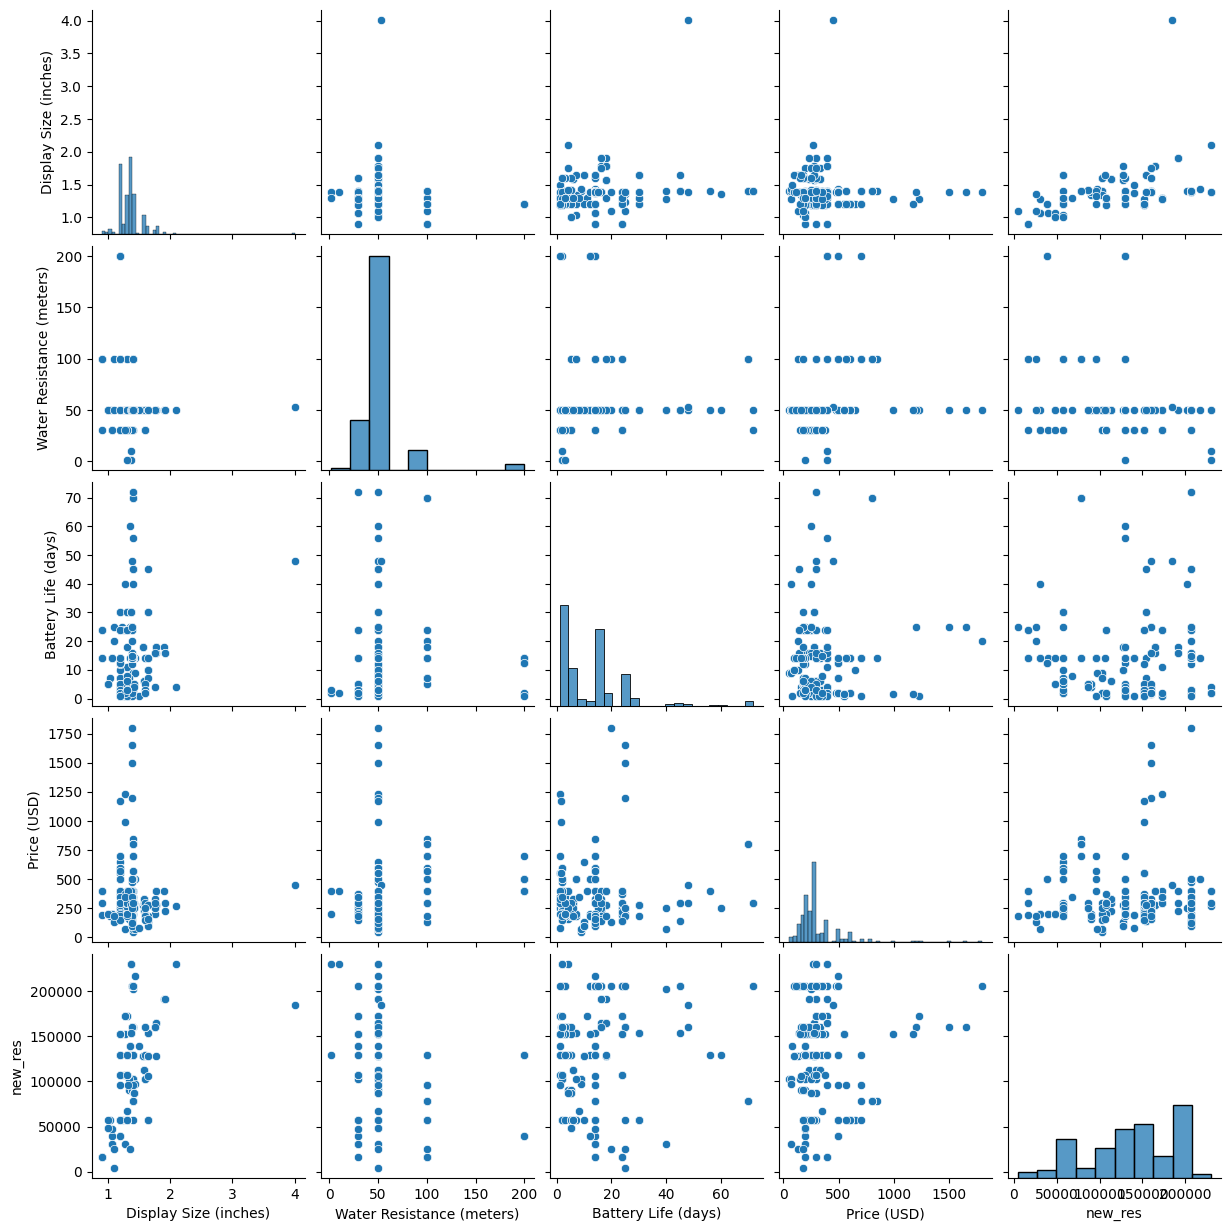

In [34]:
sns.pairplot(df_fix)

How about we see the correlation between the data from categorical 

In [35]:
categorical_features

Index(['Brand', 'Model', 'Operating System', 'Connectivity', 'Display Type',
       'Heart Rate Monitor', 'GPS', 'NFC'],
      dtype='object')

In [36]:
test_brand = numerical_features.to_list()
test_brand.append("Brand")
test_brand.append("Model")
test_brand

df_fix[test_brand].groupby(["Brand", "Model"]).mean().sort_values(['Price (USD)'], ascending=False)

Display Size (inches)  \
Brand     Model                                         
TAG Heuer Connected                              1.39   
          Connected Modular 45                   1.39   
Montblanc Summit 2+                              1.28   
          Summit 2                               1.24   
Garmin    Fenix 6 Pro Solar                      1.40   
...                                               ...   
Honor     Watch ES                               1.64   
Timex     Metropolitan+                          1.50   
Amazfit   Bip U Pro                              1.43   
          Bip S                                  1.28   
Xiaomi    Mi Watch Lite                          1.40   

                                Water Resistance (meters)  \
Brand     Model                                             
TAG Heuer Connected                                  50.0   
          Connected Modular 45                       50.0   
Montblanc Summit 2+                                  50.0   
          Summit 2                                   50.0   
Garmin    Fenix 6 Pro Solar                         100.0   
...                                                   ...   
Honor     Watch ES                                   50.0   
Timex     Metropolitan+                              50.0   
Amazfit   Bip U Pro                                  50.0   
          Bip S                                      50.0   
Xiaomi    Mi Watch Lite                              50.0   

                                Battery Life (days)  Price (USD)  \
Brand     Model                                                    
TAG Heuer Connected                            20.0       1800.0   
          Connected Modular 45                 25.0       1450.0   
Montblanc Summit 2+                             1.0       1230.0   
          Summit 2                              1.5       1080.0   
Garmin    Fenix 6 Pro Solar                    14.0        849.0   
...                                             ...          ...   
Honor     Watch ES                             10.0         99.0   
Timex     Metropolitan+                         1.0         79.0   
Amazfit   Bip U Pro                             9.0         69.0   
          Bip S                                40.0         69.0   
Xiaomi    Mi Watch Lite                         9.0         59.0   

                                      new_res  
Brand     Model                                
TAG Heuer Connected             206116.000000  
          Connected Modular 45  160000.000000  
Montblanc Summit 2+             173056.000000  
          Summit 2              152100.000000  
Garmin    Fenix 6 Pro Solar      78400.000000  
...                                       ...  
Honor     Watch ES              127680.000000  
Timex     Metropolitan+         139611.029333  
Amazfit   Bip U Pro              96640.000000  
          Bip S                  30976.000000  
Xiaomi    Mi Watch Lite         102400.000000  

[140 rows x 5 columns]

How about operation system, I want to know if it's make a cause?

In [37]:
df_fix['Operating System'].value_counts()

Operating System
Wear OS           133
Garmin OS          34
Lite OS            26
Fitbit OS          24
Amazfit OS         19
watchOS            14
Tizen OS           14
Proprietary OS     12
Polar OS           11
Proprietary         9
Suunto OS           9
Android Wear        9
ColorOS             7
Withings OS         6
Zepp OS             5
Tizen               4
LiteOS              4
Timex OS            4
Casio OS            4
HarmonyOS           3
Custom OS           3
Fossil OS           3
Android OS          3
Matrix OS           2
Realme OS           2
MyKronoz OS         2
MIUI                2
MIUI for Watch      2
Android             2
Mi Wear OS          1
Nubia OS            1
Hybrid OS           1
RTOS                1
Skagen OS           1
MIUI For Watch      1
Name: count, dtype: int64

In [38]:
df_fix[['Operating System', "Price (USD)"]].groupby("Operating System").mean().sort_values(['Price (USD)'], ascending=False)

,Price (USD)
Operating System,
Suunto OS,600.111111
Matrix OS,499.000000
Garmin OS,469.882353
Nubia OS,449.000000
Casio OS,399.000000
Android Wear,375.888889
HarmonyOS,365.666667
Polar OS,341.727273
watchOS,339.000000


I think brand really make the price of watch.

How about Display Type, Heart Monitor, NFC and GPS let's see the impact of them

In [39]:
df_fix['NFC'].value_counts()

NFC
Yes    317
No      61
Name: count, dtype: int64

In [40]:
df_fix['GPS'].value_counts()

GPS
Yes    348
No      30
Name: count, dtype: int64

In [41]:
df['Heart Rate Monitor'].value_counts()

Heart Rate Monitor
Yes    378
Name: count, dtype: int64

In [42]:
df_fix['Heart Rate Monitor'].value_counts()

Heart Rate Monitor
Yes    378
Name: count, dtype: int64

All of watches have it so I think it doesnt matter

In [43]:
df_fix[['Price (USD)', 'GPS',  "NFC"]].groupby(['NFC', "GPS"]).mean()

Price (USD)
NFC GPS             
No  No    168.200000
    Yes   320.764706
Yes No    164.800000
    Yes   326.454545

I think not have GPS make price drop a lot, so let's just consider GPS as our feature for prediction 

In [44]:
df_fix['Display Type'].value_counts()

Display Type
AMOLED                                                   208
LCD                                                       30
Transflective                                             28
Super AMOLED                                              17
OLED                                                      17
Retina                                                    14
IPS LCD                                                   14
TFT LCD                                                    9
PMOLED                                                     8
E-Ink                                                      7
Monochrome                                                 3
Sunlight-visible, transflective memory-in-pixel (MIP)      3
P-OLED                                                     3
IPS                                                        2
transflective                                              2
MIP                                                        2
TFT        

In [45]:
df_fix[['Display Type', 'Price (USD)']].groupby(['Display Type']).mean().sort_values(['Price (USD)'], ascending=False)

,Price (USD)
Display Type,
Sunlight-visible,799.000000
Memory-in-pixel (MIP),649.000000
"Sunlight-visible, transflective memory-in-pixel (MIP)",599.000000
MIP,599.000000
OLED,568.588235
transflective,549.000000
Dual Layer,549.000000
Transflective,524.392857
Color Touch,499.000000


In [54]:
df_fix[['Connectivity', 'GPS','Price (USD)']].groupby(['Connectivity', 'GPS']).mean()



Price (USD)
Connectivity               GPS             
Bluetooth                  No    159.750000
                           Yes   389.000000
Bluetooth, Wi-Fi           No    168.181818
                           Yes   316.830258
Bluetooth, Wi-Fi, Cellular Yes   354.031250
Bluetooth, Wi-Fi, GPS      Yes   382.000000
Bluetooth, Wi-Fi, NFC      Yes   199.000000

I think we can skip connectivity because it has been included at GPS features

I don't really sure but I will make this feature as my one hot encoding

## Make A Prediction

Let's make a prediction to make 

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectPercentile, chi2

cat_pipeline = Pipeline(
    steps=[
        ('enc', OneHotEncoder(handle_unknown='ignore')),
        ('sel', SelectPercentile(chi2, percentile=50))
    ]
)



In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline(
    steps=[
        ('imp', SimpleImputer()),
        ('scal', StandardScaler())
    ]
)

In [60]:
cat_feat = categorical_features.to_list()
a =  ['Model', 'Heart Rate Monitor', 'NFC', 'Connectivity', 'Display Type']
cat_feat = ['Brand', 'Operating System', 'GPS']

In [69]:
num_feat = numerical_features.to_list()
num_feat.remove('Price (USD)')
num_feat

['Display Size (inches)',
 'Water Resistance (meters)',
 'Battery Life (days)',
 'new_res']

In [72]:
X_feat = num_feat + cat_feat
y_feat = ["Price (USD)"]
X_feat, y_feat

(['Display Size (inches)',
  'Water Resistance (meters)',
  'Battery Life (days)',
  'new_res',
  'Brand',
  'Operating System',
  'GPS'],
 ['Price (USD)'])

In [74]:
X = df_fix[X_feat]
y = df_fix[y_feat]
y

,Price (USD)
0,399.0
1,249.0
2,399.0
3,229.0
4,299.0
...,...
374,279.0
375,349.0
376,249.0
377,159.0


In [75]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=3)
len(X_train), len(X_val)

(302, 76)

In [76]:
from sklearn.compose import ColumnTransformer
prep_pipeline = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_feat),
        ('cat', cat_pipeline, cat_feat)
    ]
)

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

In [77]:
from sklearn.linear_model import LinearRegression
clf_1 = Pipeline(
    steps=[
        ('preprocessing', prep_pipeline),
        ('classifier', LinearRegression())
    ]
)

In [78]:
clf_1.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scal',
                                                                   StandardScaler())]),
                                                  ['Display Size (inches)',
                                                   'Water Resistance (meters)',
                                                   'Battery Life (days)',
                                                   'new_res']),
                                                 ('cat',
                                                  Pipeline(steps=[('enc',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('sel',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function chi2 at 0x0000020D73B2BEC0>))]),
                                                  ['Brand', 'Operating System',
                                                   'GPS'])])),
                ('classifier', LinearRegression())])

In [79]:
from sklearn.metrics import mean_squared_error, r2_score
y_val_pred = clf_1.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
mse, r2

(10460.82115355801, 0.7728648879382916)

In [80]:
from sklearn.linear_model import Lasso, Ridge
clf_2 = Pipeline(
    steps=[
        ('preprocessing', prep_pipeline),
        ('classifier', Lasso())
    ]
)

In [83]:
clf_2.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scal',
                                                                   StandardScaler())]),
                                                  ['Display Size (inches)',
                                                   'Water Resistance (meters)',
                                                   'Battery Life (days)',
                                                   'new_res']),
                                                 ('cat',
                                                  Pipeline(steps=[('enc',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('sel',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function chi2 at 0x0000020D73B2BEC0>))]),
                                                  ['Brand', 'Operating System',
                                                   'GPS'])])),
                ('classifier', Lasso())])

In [85]:
y_val_pred_2 = clf_2.predict(X_val)
mse_2 = mean_squared_error(y_val, y_val_pred_2)
r2_2 = r2_score(y_val, y_val_pred_2)
mse_2, r2_2

(11211.224382868211, 0.7565714326656271)

In [86]:
from sklearn.linear_model import Lasso, Ridge
clf_3 = Pipeline(
    steps=[
        ('preprocessing', prep_pipeline),
        ('classifier', Ridge())
    ]
)
clf_3.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scal',
                                                                   StandardScaler())]),
                                                  ['Display Size (inches)',
                                                   'Water Resistance (meters)',
                                                   'Battery Life (days)',
                                                   'new_res']),
                                                 ('cat',
                                                  Pipeline(steps=[('enc',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('sel',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function chi2 at 0x0000020D73B2BEC0>))]),
                                                  ['Brand', 'Operating System',
                                                   'GPS'])])),
                ('classifier', Ridge())])

In [87]:
y_val_pred_3 = clf_3.predict(X_val)
mse_3 = mean_squared_error(y_val, y_val_pred_3)
r2_3 = r2_score(y_val, y_val_pred_3)
mse_3, r2_3

(14252.406794371602, 0.6905384417849855)

In [91]:

clf_4 = Pipeline(
    steps=[
        ('preprocessing', prep_pipeline),
        ('classifier', ElasticNet(alpha=1.0, l1_ratio=0.5))
    ]
)
clf_4.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scal',
                                                                   StandardScaler())]),
                                                  ['Display Size (inches)',
                                                   'Water Resistance (meters)',
                                                   'Battery Life (days)',
                                                   'new_res']),
                                                 ('cat',
                                                  Pipeline(steps=[('enc',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('sel',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function chi2 at 0x0000020D73B2BEC0>))]),
                                                  ['Brand', 'Operating System',
                                                   'GPS'])])),
                ('classifier', ElasticNet())])

In [96]:
y_val_pred_4 = clf_4.predict(X_val)
mse_4 = mean_squared_error(y_val, y_val_pred_4)
r2_4 = r2_score(y_val, y_val_pred_4)
mse_4, r2_4

(40721.05364017373, 0.11582647804988033)

In [100]:
clf_5 = Pipeline(
    steps=[
        ('preprocessing', prep_pipeline),
        ('classifier', DecisionTreeRegressor(random_state=42))
    ]
)
clf_5.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scal',
                                                                   StandardScaler())]),
                                                  ['Display Size (inches)',
                                                   'Water Resistance (meters)',
                                                   'Battery Life (days)',
                                                   'new_res']),
                                                 ('cat',
                                                  Pipeline(steps=[('enc',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('sel',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function chi2 at 0x0000020D73B2BEC0>))]),
                                                  ['Brand', 'Operating System',
                                                   'GPS'])])),
                ('classifier', DecisionTreeRegressor(random_state=42))])

In [101]:
y_val_pred_5 = clf_5.predict(X_val)
mse_5 = mean_squared_error(y_val, y_val_pred_5)
r2_5 = r2_score(y_val, y_val_pred_5)
mse_5, r2_5

(6736.112341866571, 0.8537392419609695)

In [102]:
clf_6 = Pipeline(
    steps=[
        ('preprocessing', prep_pipeline),
        ('classifier', RandomForestRegressor(random_state=42))
    ]
)
clf_6.fit(X_train, y_train)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scal',
                                                                   StandardScaler())]),
                                                  ['Display Size (inches)',
                                                   'Water Resistance (meters)',
                                                   'Battery Life (days)',
                                                   'new_res']),
                                                 ('cat',
                                                  Pipeline(steps=[('enc',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('sel',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function chi2 at 0x0000020D73B2BEC0>))]),
                                                  ['Brand', 'Operating System',
                                                   'GPS'])])),
                ('classifier', RandomForestRegressor(random_state=42))])

In [103]:
y_val_pred_6 = clf_6.predict(X_val)
mse_6 = mean_squared_error(y_val, y_val_pred_6)
r2_6 = r2_score(y_val, y_val_pred_6)
mse_6, r2_6

(5659.63100082419, 0.8771128095271099)

In [106]:
clf_7 = Pipeline(
    steps=[
        ('preprocessing', prep_pipeline),
        ('classifier', XGBRegressor(random_state=42))
    ]
)
clf_7.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scal',
                                                                   StandardScaler())]),
                                                  ['Display Size (inches)',
                                                   'Water Resistance (meters)',
                                                   'Battery Life (days)',
                                                   'new_res']),
                                                 ('cat',
                                                  Pipeline(steps=[('enc',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('sel',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function c...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

In [107]:
y_val_pred_7 = clf_7.predict(X_val)
mse_7 = mean_squared_error(y_val, y_val_pred_7)
r2_7 = r2_score(y_val, y_val_pred_7)
mse_7, r2_7

(4501.278211479921, 0.902264046390118)

In [108]:
clf_8 = Pipeline(
    steps=[
        ('preprocessing', prep_pipeline),
        ('classifier', CatBoostRegressor(random_state=42))
    ]
)
clf_8.fit(X_train, y_train)

Learning rate set to 0.033886
0:	learn: 196.8406898	total: 166ms	remaining: 2m 45s
1:	learn: 194.1068324	total: 174ms	remaining: 1m 26s
2:	learn: 191.5517668	total: 175ms	remaining: 58.1s
3:	learn: 189.5029289	total: 176ms	remaining: 43.9s
4:	learn: 187.1531363	total: 178ms	remaining: 35.3s
5:	learn: 184.6266178	total: 179ms	remaining: 29.6s
6:	learn: 182.0022637	total: 180ms	remaining: 25.6s
7:	learn: 180.2102088	total: 182ms	remaining: 22.6s
8:	learn: 177.5410809	total: 183ms	remaining: 20.2s
9:	learn: 175.3257978	total: 185ms	remaining: 18.3s
10:	learn: 173.2474461	total: 186ms	remaining: 16.7s
11:	learn: 171.4954303	total: 187ms	remaining: 15.4s
12:	learn: 169.8351036	total: 188ms	remaining: 14.3s
13:	learn: 168.4862455	total: 189ms	remaining: 13.3s
14:	learn: 166.3871523	total: 190ms	remaining: 12.5s
15:	learn: 164.4194033	total: 191ms	remaining: 11.8s
16:	learn: 162.4724285	total: 192ms	remaining: 11.1s
17:	learn: 160.4776730	total: 194ms	remaining: 10.6s
18:	learn: 158.6860879	t

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scal',
                                                                   StandardScaler())]),
                                                  ['Display Size (inches)',
                                                   'Water Resistance (meters)',
                                                   'Battery Life (days)',
                                                   'new_res']),
                                                 ('cat',
                                                  Pipeline(steps=[('enc',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('sel',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function chi2 at 0x0000020D73B2BEC0>))]),
                                                  ['Brand', 'Operating System',
                                                   'GPS'])])),
                ('classifier',
                 <catboost.core.CatBoostRegressor object at 0x0000020D7531E850>)])

In [109]:
y_val_pred_8 = clf_8.predict(X_val)
mse_8 = mean_squared_error(y_val, y_val_pred_8)
r2_8 = r2_score(y_val, y_val_pred_8)
mse_8, r2_8

(5154.10536265238, 0.8880892539945853)

In [120]:
prep_pipe = Pipeline(
    steps=[
        ('pipeline', prep_pipeline)
    ]
)
prep_pipe.fit(X_train, y_train)
X_search = prep_pipe.fit_transform(X_train,y_train)

X_search


<302x43 sparse matrix of type '<class 'numpy.float64'>'
	with 1646 stored elements in Compressed Sparse Row format>

In [142]:
param_grid = {
        'max_depth' :[1,2,3,4,5,6,7],
    'learning_rate':[0.1, 0.01, 0.5],
        'scale_pos_weight':[1,3,5],
            'gamma':[0,0.25,1],
    'reg_lambda':[0, 1.0, 10.0],
}

optimal_params = GridSearchCV(estimator = XGBRegressor(random_state=42), param_grid = param_grid, verbose = 10)
optimal_params.fit(X_search, y_train, verbose = False)

Fitting 5 folds for each of 567 candidates, totalling 2835 fits
[CV 1/5; 1/567] START gamma=0, learning_rate=0.1, max_depth=1, reg_lambda=0, scale_pos_weight=1
[CV 1/5; 1/567] END gamma=0, learning_rate=0.1, max_depth=1, reg_lambda=0, scale_pos_weight=1;, score=0.378 total time=   0.0s
[CV 2/5; 1/567] START gamma=0, learning_rate=0.1, max_depth=1, reg_lambda=0, scale_pos_weight=1
[CV 2/5; 1/567] END gamma=0, learning_rate=0.1, max_depth=1, reg_lambda=0, scale_pos_weight=1;, score=0.710 total time=   0.0s
[CV 3/5; 1/567] START gamma=0, learning_rate=0.1, max_depth=1, reg_lambda=0, scale_pos_weight=1
[CV 3/5; 1/567] END gamma=0, learning_rate=0.1, max_depth=1, reg_lambda=0, scale_pos_weight=1;, score=0.738 total time=   0.0s
[CV 4/5; 1/567] START gamma=0, learning_rate=0.1, max_depth=1, reg_lambda=0, scale_pos_weight=1
[CV 4/5; 1/567] END gamma=0, learning_rate=0.1, max_depth=1, reg_lambda=0, scale_pos_weight=1;, score=0.727 total time=   0.0s
[CV 5/5; 1/567] START gamma=0, learning_rate

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             param_grid={'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'reg_lambda': [0, 1.0, 10.0],
                         'scale_pos_weight': [1, 3, 5]},
             verbose=10)

In [143]:
best_clf = optimal_params.best_estimator_
best_clf

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [144]:
clf_best = Pipeline(
    steps=[
        ('preprocessing', prep_pipeline),
        ('classifier', best_clf)
    ]
)
clf_best.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('scal',
                                                                   StandardScaler())]),
                                                  ['Display Size (inches)',
                                                   'Water Resistance (meters)',
                                                   'Battery Life (days)',
                                                   'new_res']),
                                                 ('cat',
                                                  Pipeline(steps=[('enc',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('sel',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function c...
                              feature_types=None, gamma=1, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.5,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=2, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

In [145]:
y_val_pred_best = clf_best.predict(X_val)
mse_best = mean_squared_error(y_val, y_val_pred_best)
r2_best = r2_score(y_val, y_val_pred_best)
mse_best, r2_best

(4000.6494693113223, 0.9131341648812559)

In [149]:
pd.DataFrame([y_val_pred_best, y_val])

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,249.509491,448.682739,194.87294,254.262344,117.204185,289.767029,304.365997,247.168304,262.444946,220.132812,...,194.87294,284.723358,219.602585,264.599823,249.509491,274.735016,650.559509,286.579163,223.846115,358.326447
1,Price (USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
result = y_val.reset_index().drop(['index'], axis=1)
result['Pred Best'] = pd.Series(y_val_pred_best)
result

,Price (USD),Pred Best
0,299.0,249.509491
1,649.0,448.682739
2,199.0,194.872940
3,249.0,254.262344
4,149.0,117.204185
...,...,...
71,279.0,274.735016
72,569.0,650.559509
73,249.0,286.579163
74,249.0,223.846115


In [158]:
np.sqrt(mse_best)

63.25068750070091